In [30]:
%%bash
#strace -f -tt -T -r -y -o logs/view4.st python src/mmarrays.py 100000
strace -f -tt -T -r -y -o logs/view4.st python src/multi_threaded.py
#strace -f -tt -T -r -y -o logs/view4.st lscpu

In [2]:
from strace_miner.views.v4 import IOMinerV4
from strace_miner.views.v3 import IOLineReaderV3

In [3]:
st_logs = ['logs/python_a65243794be3_24779.st','logs/python_a65243794be3_24781.st']
#st_logs = ['logs/view4.st',]
io_calls = ['read','write']
#line_reader = IOLineReaderV3(['data_rank',],collapse=True)
line_reader = IOLineReaderV3(['/dev/data/',],collapse=False)
#line_reader = IOLineReaderV3(collapse=False)
sta = IOMinerV4(st_logs,io_calls,line_reader)
sta.preprocess()
sta.prepare_summaries_and_event_log()
sta.prepare_dfg()

CSV log path: logs/python_a65243794be3_24779.csv
CSV log path: logs/python_a65243794be3_24781.csv

Overall Summary:

Run time: 1.089s
Total duration of Sys calls: 5.143s
System load: 4.724

IO duration: 0.052s
IO load: 1.00%
Total IO events: 27



/home/vscode/.local/lib/python3.12/site-packages/pm4py/utils.py:538: UserWarning: the EventLog class has been deprecated and will be removed in a future release.
  warnings.warn("the EventLog class has been deprecated and will be removed in a future release.")


In [4]:
sta.print_events_summary()

                                                        event  count  max_parallel  io_percent
                        [read, [<4KB], /lib/x86_64-linux-gnu]     16             2        1.70
                            [read, [<4MB], /etc/locale.alias]      4             1        0.48
                                 [read, [<4KB], /dev/urandom]      6             1        0.59
                                   [read, [<4MB], /usr/share]      4             2        0.62
                                   [read, [<4MB], /opt/conda]    193             2       23.64
                                   [read, [<4KB], /opt/conda]    336             2       32.02
                    [read, [<4MB], /workspaces/hdf5-tutorial]      8             1        0.89
                    [read, [<4KB], /workspaces/hdf5-tutorial]      4             1        0.28
                                 [read, [<4MB], /home/vscode]      2             1        0.32
                                 [read, [<4KB], /h

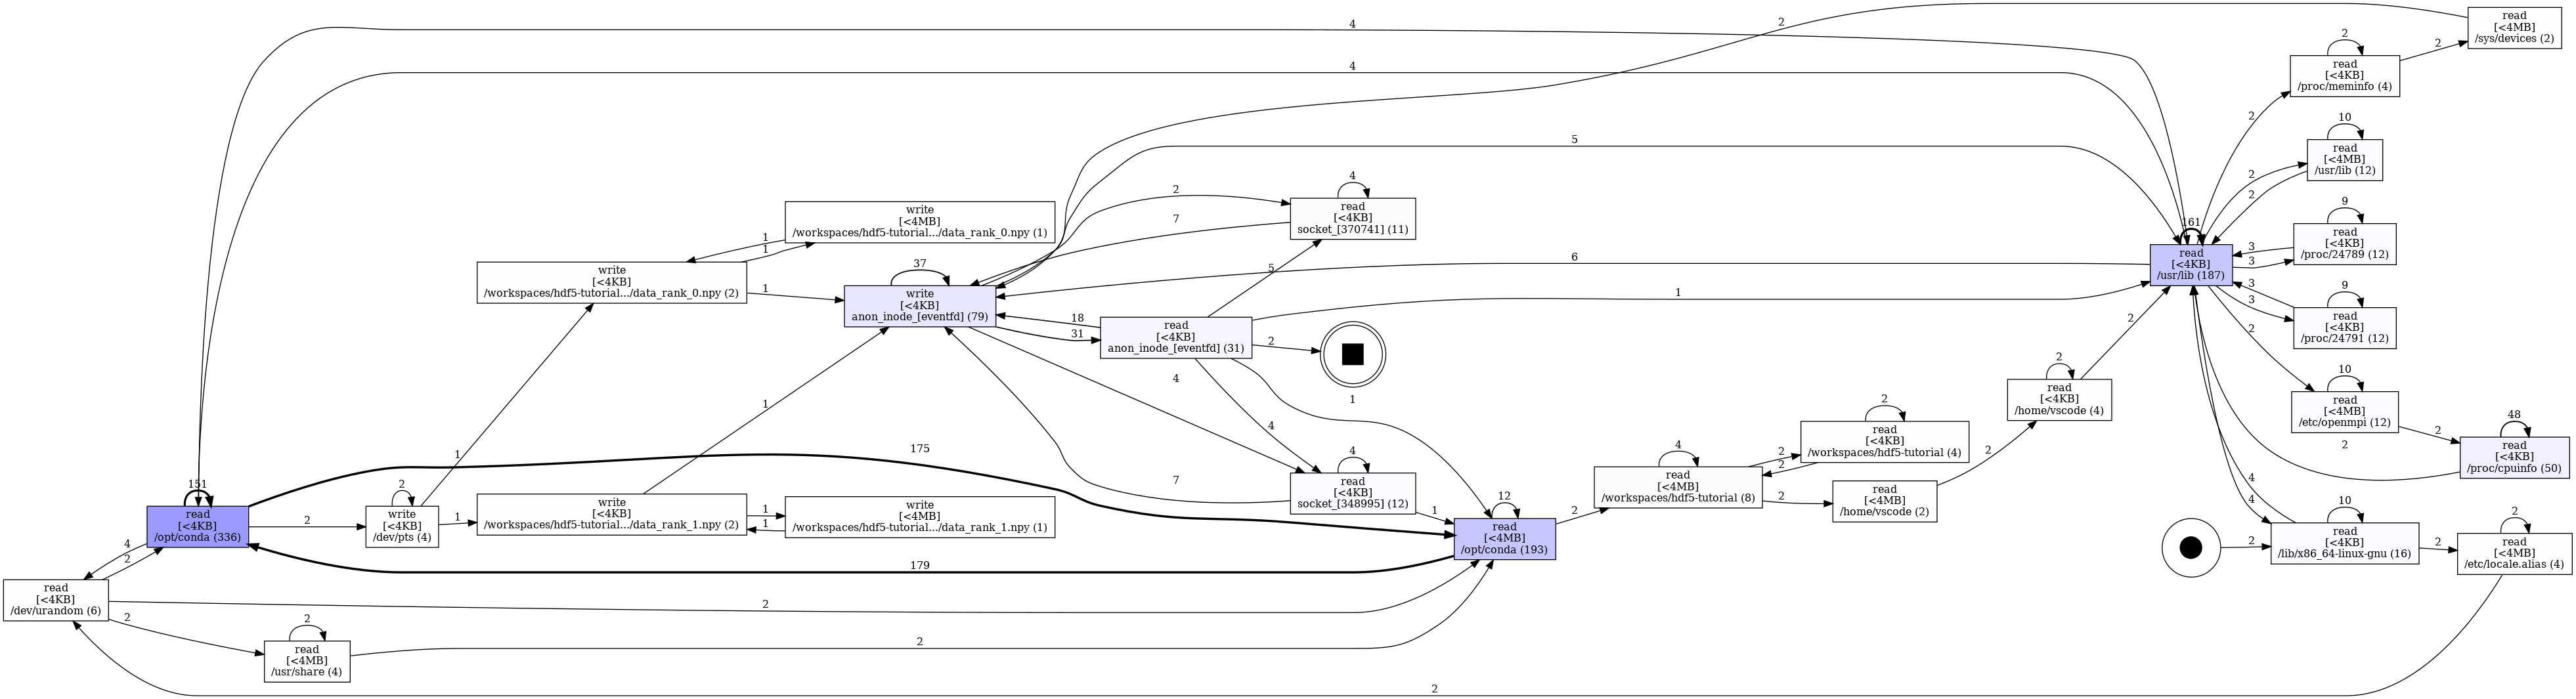

In [5]:
sta.view_dfg()